In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Let our data be
$A = \left[ \matrix{ 1 & 1 \\ 2 & 3 \\ 1 & 2} \right] \in \mathbb{R}^{3 \times 2}$ and $\vec{y} = \left[ \matrix{2 \\ 5 \\ 1} \right] \in \mathbb{R}^{3}$. We do a variety of regression problems with this data.

In [3]:
A = np.array([[1,1],[2,3], [1,2]])
y = np.array([2, 5, 1])

## 1) Least squares

Consider the ordinary least squares problem 
$$
\mathrm{OLS} \doteq \mathrm{argmin}_{\vec{x}} \|A\vec{x} - \vec{y}\|_{2}^{2}
$$

Denote the optimal value of $\vec{x}$ by $\vec{x}_{\mathrm{LS}}$. 
What is $\vec{x}_{\mathrm{LS}}$? What is the value of the objective at this optimal $\vec{x}_{\mathrm{LS}}$?

In [4]:
def ls(x):
    return np.linalg.norm(A @ x - y)**2

In [15]:
# Fill in the expression for the optimal x in terms of matrix A and vector y 
# You may use A, y defined in the code block above

x_LS = np.linalg.inv(A.T @ A) @ A.T @ y # TODO: fill this in 
print(x_LS)
print(ls(x_LS))

[ 3.66666667 -1.        ]
1.3333333333333333


Plot level sets of the objective, i.e., contours of $\vec{x}$ which satisfy $\|A\vec{x} - \vec{y}\|_{2}^2 = c$ for a few values of $c$.

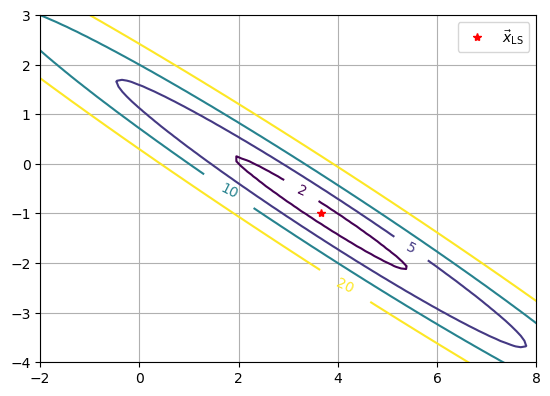

In [20]:
# Plot contours

x1_range = np.linspace(-10,10,200)
x2_range = np.linspace(-10,10,200)

x1, x2 = np.meshgrid(x1_range, x2_range)
r = sum((x1*A[i][0] + x2*A[i][1] - y[i]) ** 2 for i in range(len(A)))

cs = plt.contour(x1, x2, r, levels = [2, 5, 10, 20])
plt.plot(x_LS[0], x_LS[1], 'r*', label = r'$\vec{x}_{\mathrm{LS}}$')
plt.axis('scaled')
plt.clabel(cs,inline=1,fontsize=10)

plt.xlim([-2,8])
plt.ylim([-4,3])
plt.legend()
plt.grid()
plt.show()

Describe the contours plotted in the figure and their relation to $\vec{x}_{\mathrm{LS}}^*$.

*Solution*:

The cost contours are ellipses centered at $\vec{x}_{\mathrm{LS}}$. As we go further from the optimal $\vec{x}_{\mathrm{LS}}$, the cost increases. 

## 2) Ridge regression 

Consider the ridge regression problem
$$
\mathrm{Ridge}(\lambda) \doteq \mathrm{argmin}_{\vec{x}} \|A\vec{x} - \vec{y}\|_2^2 + \lambda \|\vec{x}\|_2^2.
$$

Consider $\lambda = 1$. What is the ridge regression solution $\vec{x}_{\mathrm{RR}}$? What is the value of the _ordinary least squares_ objective at $\vec{x}_{\mathrm{RR}}$?

In [13]:
lmbda = 1

In [16]:
# Fill in the expression for the optimal w in terms of matrix X and vector y 

x_RR = np.linalg.inv(A.T @ A + lmbda * np.eye(A.shape[1])) @ A.T @ y # TODO: fill this in 
print(x_RR)
print(ls(x_RR))

[1.         0.66666667]
2.8888888888888884


Plot level sets of the ridge regression objective, i.e., contours of $\vec{x}$ which satisfy $\|A\vec{x} - \vec{y}\|_2^2 + \lambda \|\vec{x}\|_2^2 = c$ for a few values of $c$.

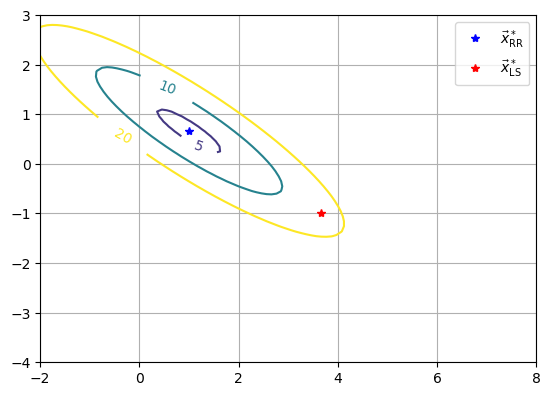

In [18]:
# Plot contours 

x1_range = np.linspace(-10,10,200)
x2_range = np.linspace(-10,10,200)

x1, x2 = np.meshgrid(x1_range, x2_range)
r = sum((x1*A[i][0] + x2*A[i][1] - y[i]) ** 2 for i in range(len(A))) + lmbda*(x1**2 + x2**2)

cs = plt.contour(x1, x2, r, levels = [2, 5, 10, 20])
plt.plot(x_RR[0], x_RR[1], 'b*', label = r'$\vec{x}_{\mathrm{RR}}^*$')
plt.plot(x_LS[0], x_LS[1], 'r*', label = r'$\vec{x}_{\mathrm{LS}}^*$')
plt.axis('scaled')
plt.clabel(cs,inline=1,fontsize=10)

plt.xlim([-2,8])
plt.ylim([-4,3])
plt.legend()
plt.grid()
plt.show()

Describe the contours plotted in the figure, and their relation to $\vec{x}_{\mathrm{RR}}$, $\vec{x}_{\mathrm{LS}}$.


*Solution*:

The cost contours are ellipses centered at $\vec{x}_{\mathrm{RR}}$. As we go further from the optimal $\vec{x}_{\mathrm{RR}}$, the cost increases. The least squares optimal solution $\vec{x}_{\mathrm{LS}}$ has a non zero cost in the ridge regression objective. 

Now we see where the ridge regression solution is placed relative to the level sets of the ordinary least squares objective.

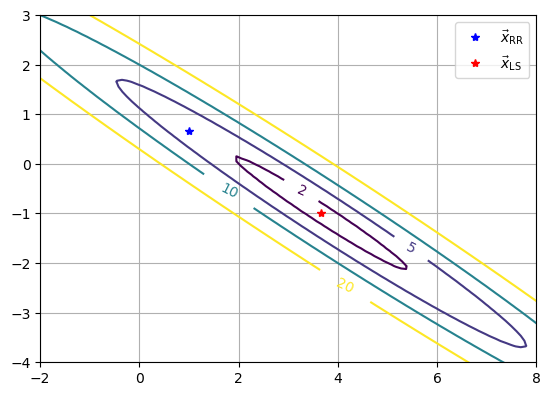

In [19]:
# Plot contours 

x1_range = np.linspace(-10,10,200)
x2_range = np.linspace(-10,10,200)

x1, x2 = np.meshgrid(x1_range, x2_range)
r = sum((x1*A[i][0] + x2*A[i][1] - y[i]) ** 2 for i in range(len(A)))

cs = plt.contour(x1, x2, r, levels = [2, 5, 10, 20])
plt.plot(x_RR[0], x_RR[1], 'b*', label = r'$\vec{x}_{\mathrm{RR}}$')
plt.plot(x_LS[0], x_LS[1], 'r*', label = r'$\vec{x}_{\mathrm{LS}}$')
plt.axis('scaled')
plt.clabel(cs,inline=1,fontsize=10)

plt.xlim([-2,8])
plt.ylim([-4,3])
plt.legend()
plt.grid()
plt.show()

How does the ridge regression weight $\vec{x}_{\mathrm{RR}}$ relate to the least squares contours?

_Solution:_
It is not optimal, i.e., at the center of the least squares contours; it is much closer to $0$ than the least squares solution.

## 3) Connection between ridge regression and constrained least squares

Consider the constrained least squares problem:
$$\ell^{2}\text{CLS}(k) \doteq \mathrm{argmin}_{\vec{x} \colon \|\vec{x}\|_{2}^{2} \leq k}\|A\vec{x} - \vec{y}\|_{2}^{2}.$$

We can visualise the feasible space of this problem as a circle centered at the origin with radius $\sqrt{k}$. For the rest of the problem, let $k = 1$.

In [22]:
k = 1

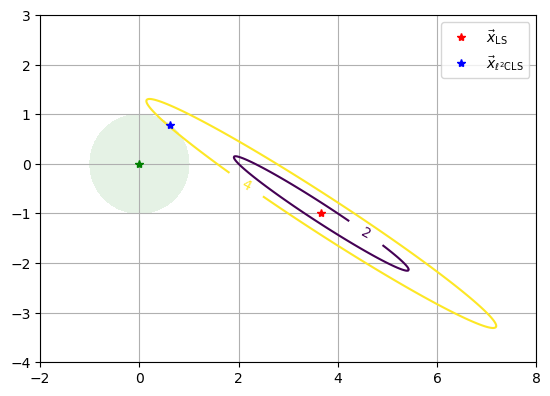

In [31]:
# Plot contours

x1_range = np.linspace(-10,10,1000)
x2_range = np.linspace(-10,10,1000)

x1, x2 = np.meshgrid(x1_range, x2_range)
r = sum((x1*A[i][0] + x2*A[i][1] - y[i]) ** 2 for i in range(len(A))) 

cs = plt.contour(x1, x2, r, levels = [2, 4])
plt.plot(x_LS[0], x_LS[1], 'r*', label = r'$\vec{x}_{\mathrm{LS}}$')
plt.axis('scaled')
plt.clabel(cs,inline=1,fontsize=10)

circ = x1**2 + x2**2
constraint = plt.contourf(x1, x2, circ, levels = [0, k ** 0.5], colors = ["g","g"], alpha = 0.1)
plt.plot(0, 0, 'g*')

# Plot optimal 
x_CLS_opt = (0, 0)
CLS_opt_obj = float('inf')
for i in range(len(x1)):
    for j in range(len(x1[0])):
        if x1[i, j] **2 + x2[i, j] ** 2 <= k:
            x_CLS = np.array([x1[i, j], x2[i, j]])
            CLS_obj = ls(x_CLS)
            if CLS_obj < CLS_opt_obj:
                CLS_opt_obj = CLS_obj
                x_CLS_opt = x_CLS
plt.plot(x_CLS_opt[0], x_CLS_opt[1], 'b*', label= r'$\vec{x}_{\ell^{2}\mathrm{CLS}}$')
            

plt.xlim([-2,8])
plt.ylim([-4,3])
plt.legend()
plt.grid()
plt.show()

Here, we have plotted the feasible space (light green region) and the cost contours (which are the same as those for the ordinary least squares problem), as well as the optimal constrained least squares solution (blue).

Intuitively, the optimal solution for this constrained least squares lies on the boundary of the feasible set, and is the point within the feasible set which lies on the lowest cost contour of the least squares objective. 

It is worth it to note that this problem is equivalent to ridge regression (as you may see from part (a) of this problem). Ridge regression does not promote sparse solutions. We contrast this with LASSO regression, as we will see shortly.

## 4) LASSO tends to give a sparse solution

We now visualise how a least squares problem with an $\ell^{1}$ norm constraint can lead to sparsity, or variable selection. Consider the problem 
$$\ell^{1}\mathrm{CLS}(k) \doteq \mathrm{argmin}_{\vec{x} \colon \|\vec{x}\|_{1} \leq k}\|A\vec{x} - \vec{y}\|_{2}^{2}.$$

We plot the cost contours of the objective, shade the feasible space in light green, and plot the optimal solution in blue:


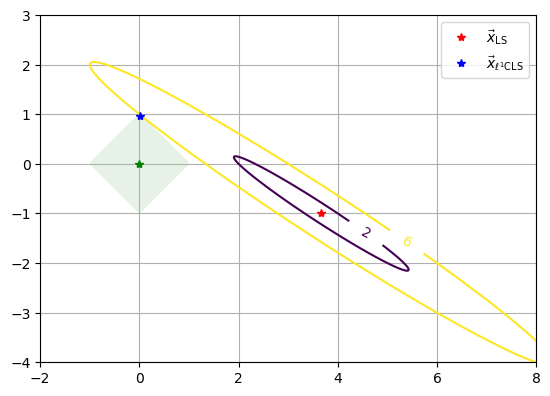

In [34]:
# Plot contours

x1_range = np.linspace(-10,10,1000)
x2_range = np.linspace(-10,10,1000)

x1, x2 = np.meshgrid(x1_range, x2_range)
r = sum((x1*A[i][0] + x2*A[i][1] - y[i]) ** 2 for i in range(len(A))) 

cs = plt.contour(x1, x2, r, levels = [2, 6])
plt.plot(x_LS[0], x_LS[1], 'r*', label = r'$\vec{x}_{\mathrm{LS}}$')
plt.axis('scaled')
plt.clabel(cs,inline=1,fontsize=10)

l1ball = np.abs(x1) + np.abs(x2)
constraint = plt.contourf(x1, x2, l1ball, levels = [0, k], colors = ["g","g"], alpha = 0.1)
plt.plot(0, 0, 'g*')

# Plot optimal 
x_CLS_opt = (0, 0)
CLS_opt_obj = float('inf')
for i in range(len(x1)):
    for j in range(len(x1[0])):
        if np.abs(x1[i, j]) + np.abs(x2[i, j]) <= k:
            x_CLS = np.array([x1[i, j], x2[i, j]])
            CLS_obj = ls(x_CLS)
            if CLS_obj < CLS_opt_obj:
                CLS_opt_obj = CLS_obj
                x_CLS_opt = x_CLS
plt.plot(x_CLS_opt[0], x_CLS_opt[1], 'b*', label= r'$\vec{x}_{\ell^{1}\mathrm{CLS}}$')
            

plt.xlim([-2,8])
plt.ylim([-4,3])
plt.legend()
plt.grid()
plt.show()

We can read the optimal $\vec{x}_{\ell^{1}\mathrm{CLS}} = [0, 1]^{\top}$ for the $\ell^{1}$-constrained least squares solution off the graph.

Note that this problem is equivalent with LASSO, as shown in part (a) of this problem. Thus, the above figure gives us an intuition for why LASSO leads to a *sparse* optimal solution. The point in the feasible region that intersects the lowest cost contour is likely to be a vertex of the $\ell^{1}$ ball, e.g., $[0,1]^{\top}$ or $[1,0]^{\top}$, and some of the elements of the optimal solution are likely to be set to $0$ as a result.

This does not happen when the feasible set is a circle, e.g., when the constraint is an $\ell^{2}$ norm instead of an $\ell^{1}$ norm. That is why LASSO leads to a sparse solution, while ridge regression does not. 

Question created by Utkarsha Agwan, edited by Druv Pai.